In [9]:
from lib.Benchmarks import PortfolioBacktest
from lib.BenchmarksTest import PortfolioBacktestTest
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

# initialize PortfolioBacktestTest
pbt = PortfolioBacktestTest()


In [10]:
### run all tests
pbt.test_all(verbose=False)

Testing PortfolioBacktest Class ...
Testing ... portfolio_weights_backtest_statistics
Testing ... rolling_sharpe_ratio
Testing ... rolling_returns
Testing ... rolling_volatility
Testing Complete


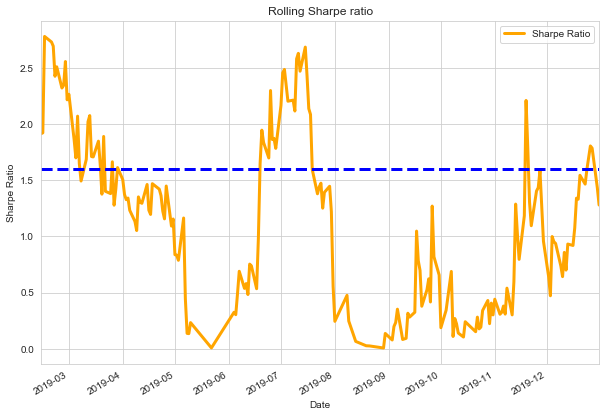

In [15]:
# rolling sharpe ratio graph
def generate_rolling_sharpe_ratio_graph():
    pb = PortfolioBacktest(pbt.asset_prices, pbt.commissions)
    pb.weights = pbt.weights
    rolling_sharpe_ratio = pb.build_rolling_sharpe_ratio(rolling_window=30)
    rolling_sharpe_ratio[rolling_sharpe_ratio['rolling_sharpe_ratio'] > 0].rolling_sharpe_ratio.plot(style='-', lw=3, color='orange', 
                                         label='Sharpe Ratio', figsize = (10,7)).axhline(y = 1.6, color = "blue", lw = 3,linestyle = '--')

    plt.ylabel('Sharpe Ratio')
    plt.legend(loc='best')
    plt.title('Rolling Sharpe ratio')
    plt.show()
    
generate_rolling_sharpe_ratio_graph()

In [17]:
# efficient frontier graph
pbt.asset_prices.head()

,EEMV,LQD,USMV,EFAV,MTUM,UUP
Date,,,,,,
2019-01-02,53.713219,107.275024,50.108906,62.795307,97.141983,25.136766
2019-01-03,53.096600,107.322426,49.375694,62.672539,94.458763,24.999516
2019-01-04,54.329834,107.256058,50.456215,64.041962,97.620079,24.960299
2019-01-07,54.426182,107.265549,50.620220,64.117516,98.556763,24.852459
2019-01-08,54.512894,107.502541,51.054352,64.249741,99.776413,24.930889


In [18]:
log_ret = np.log(pbt.asset_prices/pbt.asset_prices.shift(1))
log_ret.head()

,EEMV,LQD,USMV,EFAV,MTUM,UUP
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.011546,0.000442,-0.014740,-0.001957,-0.028010,-0.005475
2019-01-04,0.022961,-0.000619,0.021648,0.021615,0.032920,-0.001570
2019-01-07,0.001772,0.000088,0.003245,0.001179,0.009549,-0.004330
2019-01-08,0.001592,0.002207,0.008540,0.002060,0.012299,0.003151
